# Libreria 

In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#parsear XML
import csv   
from lxml import etree
#Parsear HTML
import requests
import urllib.request
from bs4 import BeautifulSoup
from urllib.request import urlopen
from bs4.builder import HTMLParserTreeBuilder
#para medir tiempo
from time import time 
import time

# Carga de Archivos XML

In [2]:
org = 'dme'
ORGANISM = org
maxi ='01040'

pathways = requests.get('http://rest.kegg.jp/list/pathway/' + ORGANISM)  #lista de las vias metabolicas y otra informacion porpocionada por KEGG

for line in pathways.text.split('\n'):         # Se recorre la lista propocionada por  KEGG donde se estraen los nombres de las vias de KEGG
      pathwayid = line.split('\t')[0].replace('path:', '') 
      A = pathwayid+'.xml'                     # Le ponemos la extencion .xml para poder cargar los archivos
      if A == str(org)+str(maxi)+'.xml':           
            break
      locals()[str(pathwayid)] = etree.parse(A) # Guarda los  XML com el nombre de la via asignado por KEGG
      locals()[str(pathwayid)] = locals()[str(pathwayid)].getroot()  # Para transformar todos lo XML en directorios de python

## ARMANDO BASE DE DATOS CON PANDAS

##### crear archivo csv para guardar los datos. 

In [3]:
#data= pd.DataFrame(columns=('n', 'enzima', 'gen', 'nob_Keeg', 'path' ,'link')) # Crear tabla csv. 
#data.to_csv('data_'+org+'.csv', sep=';')                              

In [11]:
save=len(pd.read_csv('data_'+org+'.csv',index_col=0, delimiter=';')[['n']].values)
print(save)

1754


In [8]:
save=len(pd.read_csv('data_'+org+'.csv',index_col=0, delimiter=';')[['n']].values)

n=0

for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid ==  str(org)+str(maxi):           
            break
    
    ii=locals()[str(pathwayid)]
    
    
    for i in range(0,len(ii)):
       
        if ii[i].tag=='entry':         
            A=ii[i].attrib            
            if A['type'] == 'gene':
                n=1+n
                
                if n > save:
                    
                    url = A['link']
                
                    response = requests.get(url)
                    soup = BeautifulSoup(response.text, "html.parser")
                    
                    gen    = soup.html.body.div.table.form.td.table.find_all('td')[3].find_all('div')[0].text.replace('\n', ' ').strip().split()[0].replace(',','')
                    
                    if gen == '(RefSeq)':
                        ll=6
                    else:
                        ll=7
                    
                    enzima = soup.html.body.div.table.form.td.table.find_all('td')[ll].text.strip()
                    
                    NewDat = [n , A['id'] , enzima, gen , A['name'].split( )[0] , pathwayid , A['link'] ]
                
                                
                    with open(r'data_'+org+'.csv', 'a' , newline='') as f:
                        writer = csv.writer(f,delimiter=';')
                        writer.writerow(NewDat)
                                              


In [10]:

n=0

for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
            
  
    ii=locals()[str(pathwayid)]
    
        
    
    for i in range(0,len(ii)):
       
        if ii[i].tag=='entry':         
            A=ii[i].attrib            
            if A['type'] == 'group':
                n=1+n 
                
                NewDat = [n , A['id'] , 'undefined_Enzima'+pathwayid , 'none' ,  A['name'] , pathwayid , 'no link']
                
                        
                with open(r'data_'+org+'.csv', 'a' , newline='') as f:
                    writer = csv.writer(f , delimiter=';')
                    writer.writerow(NewDat)            
           
                          

In [12]:
data=pd.read_csv('data_'+org+'.csv',index_col=0, sep=';')
data=data[['n' ,'enzima', 'nob_Keeg' ,'path']]
data=data.values
data

array([["'14'", 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
        'dme:Dmel_CG5432', 'dme00010'],
       ['14', 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
        'dme:Dmel_CG5432', 'dme00010'],
       ['38', 'aldehyde dehydrogenase (NAD+) [EC:1.2.1.3]',
        'dme:Dmel_CG31075', 'dme00010'],
       ...,
       ['72', 'undefined_Enzimadme00563', 'undefined', 'dme00563'],
       ['73', 'undefined_Enzimadme00563', 'undefined', 'dme00563'],
       ['74', 'undefined_Enzimadme00563', 'undefined', 'dme00563']],
      dtype=object)

In [13]:
for line in pathways.text.split('\n'):
    
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
    
    locals()['NODES_'+str(pathwayid)]={}
    
    for i in data:
        if i[3] == pathwayid:
            locals()['NODES_'+str(pathwayid)][i[0]]= i[1] 
            print(i[0],i[1], i[2], i[3])
    

'14' fructose-bisphosphate aldolase, class I [EC:4.1.2.13] dme:Dmel_CG5432 dme00010
14 fructose-bisphosphate aldolase, class I [EC:4.1.2.13] dme:Dmel_CG5432 dme00010
38 aldehyde dehydrogenase (NAD+) [EC:1.2.1.3] dme:Dmel_CG31075 dme00010
40 aldehyde dehydrogenase (NAD(P)+) [EC:1.2.1.5] dme:Dmel_CG11140 dme00010
45 alcohol dehydrogenase (NADP+) [EC:1.1.1.2] dme:Dmel_CG2767 dme00010
46 alcohol dehydrogenase [EC:1.1.1.1] dme:Dmel_CG3481 dme00010
48 pyruvate dehydrogenase E1 component beta subunit [EC:1.2.4.1] dme:Dmel_CG11876 dme00010
49 pyruvate dehydrogenase E1 component beta subunit [EC:1.2.4.1] dme:Dmel_CG11876 dme00010
50 pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12] dme:Dmel_CG5261 dme00010
51 L-lactate dehydrogenase [EC:1.1.1.27] dme:Dmel_CG10160 dme00010
53 pyruvate kinase [EC:2.7.1.40] dme:Dmel_CG11249 dme00010
55 enolase [EC:4.2.1.11] dme:Dmel_CG17654 dme00010
56 2,3-bisphosphoglycerate-dependent phosphoglycerate mutase [EC:5.4.2.11] dme:

112 5-aminolevulinate synthase [EC:2.3.1.37] dme:Dmel_CG3017 dme00260
115 monoamine oxidase [EC:1.4.3.4] dme:Dmel_CG13611 dme00260
116 glyoxylate/hydroxypyruvate reductase [EC:1.1.1.79 1.1.1.81] dme:Dmel_CG1236 dme00260
120 aminomethyltransferase [EC:2.1.2.10] dme:Dmel_CG6415 dme00260
123 dihydrolipoamide dehydrogenase [EC:1.8.1.4] dme:Dmel_CG7430 dme00260
125 glycine N-methyltransferase [EC:2.1.1.20] dme:Dmel_CG6188 dme00260
126 threonine dehydratase [EC:4.3.1.19] dme:Dmel_CG8129 dme00260
138 threonine aldolase [EC:4.1.2.48] dme:Dmel_CG10184 dme00260
202 alanine-glyoxylate transaminase / serine-glyoxylate transaminase / serine-pyruvate transaminase [EC:2.6.1.44 2.6.1.45 2.6.1.51] dme:Dmel_CG3926 dme00260
203 cystathionine beta-synthase [EC:4.2.1.22] dme:Dmel_CG1753 dme00260
207 alanine-glyoxylate transaminase / (R)-3-amino-2-methylpropionate-pyruvate transaminase [EC:2.6.1.44 2.6.1.40] dme:Dmel_CG11241 dme00260
216 glycerate 2-kinase [EC:2.7.1.165] dme:Dmel_CG9886 dme00260
217 2,3-bis

44 inositol polyphosphate 5-phosphatase INPP5E [EC:3.1.3.36] dme:Dmel_CG10426 dme00562
45 inositol-polyphosphate multikinase [EC:2.7.1.140 2.7.1.151] dme:Dmel_CG13688 dme00562
46 inositol-polyphosphate multikinase [EC:2.7.1.140 2.7.1.151] dme:Dmel_CG13688 dme00562
47 phosphatidylinositol-3,4,5-trisphosphate 3-phosphatase and dual-specificity protein phosphatase PTEN [EC:3.1.3.16 3.1.3.48 3.1.3.67] dme:Dmel_CG5671 dme00562
48 multiple inositol-polyphosphate phosphatase / 2,3-bisphosphoglycerate 3-phosphatase [EC:3.1.3.62 3.1.3.80] dme:Dmel_CG4123 dme00562
49 inositol-1,4,5-trisphosphate 5-phosphatase [EC:3.1.3.56] dme:Dmel_CG42283 dme00562
50 1D-myo-inositol-triphosphate 3-kinase [EC:2.7.1.127] dme:Dmel_CG4026 dme00562
55 inositol-polyphosphate multikinase [EC:2.7.1.140 2.7.1.151] dme:Dmel_CG13688 dme00562
57 inositol-1,4,5-trisphosphate 5-phosphatase [EC:3.1.3.56] dme:Dmel_CG42283 dme00562
58 inositol polyphosphate 1-phosphatase [EC:3.1.3.57] dme:Dmel_CG3028 dme00562
59 inositol polyph

In [14]:
NODES_dme00010

{"'14'": 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
 '14': 'fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
 '38': 'aldehyde dehydrogenase (NAD+) [EC:1.2.1.3]',
 '40': 'aldehyde dehydrogenase (NAD(P)+) [EC:1.2.1.5]',
 '45': 'alcohol dehydrogenase (NADP+) [EC:1.1.1.2]',
 '46': 'alcohol dehydrogenase [EC:1.1.1.1]',
 '48': 'pyruvate dehydrogenase E1 component beta subunit [EC:1.2.4.1]',
 '49': 'pyruvate dehydrogenase E1 component beta subunit [EC:1.2.4.1]',
 '50': 'pyruvate dehydrogenase E2 component (dihydrolipoamide acetyltransferase) [EC:2.3.1.12]',
 '51': 'L-lactate dehydrogenase [EC:1.1.1.27]',
 '53': 'pyruvate kinase [EC:2.7.1.40]',
 '55': 'enolase [EC:4.2.1.11]',
 '56': '2,3-bisphosphoglycerate-dependent phosphoglycerate mutase [EC:5.4.2.11]',
 '57': 'glyceraldehyde 3-phosphate dehydrogenase [EC:1.2.1.12]',
 '58': 'triosephosphate isomerase (TIM) [EC:5.3.1.1]',
 '59': '6-phosphofructokinase 1 [EC:2.7.1.11]',
 '60': 'fructose-1,6-bisphosphatase I [EC:3.1.3.11]'

## PRIMERA RED

In [15]:
EDGES=[]

for line in pathways.text.split('\n'):        
    pathwayid = line.split('\t')[0].replace('path:', '') 
    
    if pathwayid == str(org)+str(maxi):           
            break
            
    ii=locals()[str(pathwayid)]
    
    NODES=locals()['NODES_'+str(pathwayid)]
   
    for i in range(0,len(ii)):
        if ii[i].tag=='relation':         
            A=ii[i].attrib            
            if A['type'] == 'ECrel':    #relación enzima-enzima, que indica dos enzimas que catalizan pasos de reacción sucesivos
                #print(A)
                EDGES.append( [  NODES[ A['entry1'] ] , NODES[ A['entry2'] ]  ]  ) 

print(EDGES)                

[['aldose 1-epimerase [EC:5.1.3.3]', 'hexokinase [EC:2.7.1.1]'], ['aldose 1-epimerase [EC:5.1.3.3]', 'glucose-6-phosphatase [EC:3.1.3.9]'], ['hexokinase [EC:2.7.1.1]', 'aldose 1-epimerase [EC:5.1.3.3]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'hexokinase [EC:2.7.1.1]'], ['hexokinase [EC:2.7.1.1]', 'glucose-6-phosphate 1-epimerase [EC:5.1.3.15]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'glucose-6-phosphate 1-epimerase [EC:5.1.3.15]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'glucose-6-phosphatase [EC:3.1.3.9]'], ['glucose-6-phosphate 1-epimerase [EC:5.1.3.15]', 'glucose-6-phosphatase [EC:3.1.3.9]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'glucose-6-phosphatase [EC:3.1.3.9]'], ['phosphoglucomutase / phosphopentomutase [EC:5.4.2.2 5.4.2.7]', 'glucose-6-phosphatase [EC:3.1.3.9]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'hexokinase [EC:2.7.1.1]'], ['glucose-6-phosphate isomerase [EC:5.3.1.9]', 'glucose-6-phosphate 1-epimerase [EC:5.1.3.15]'], ['glucose

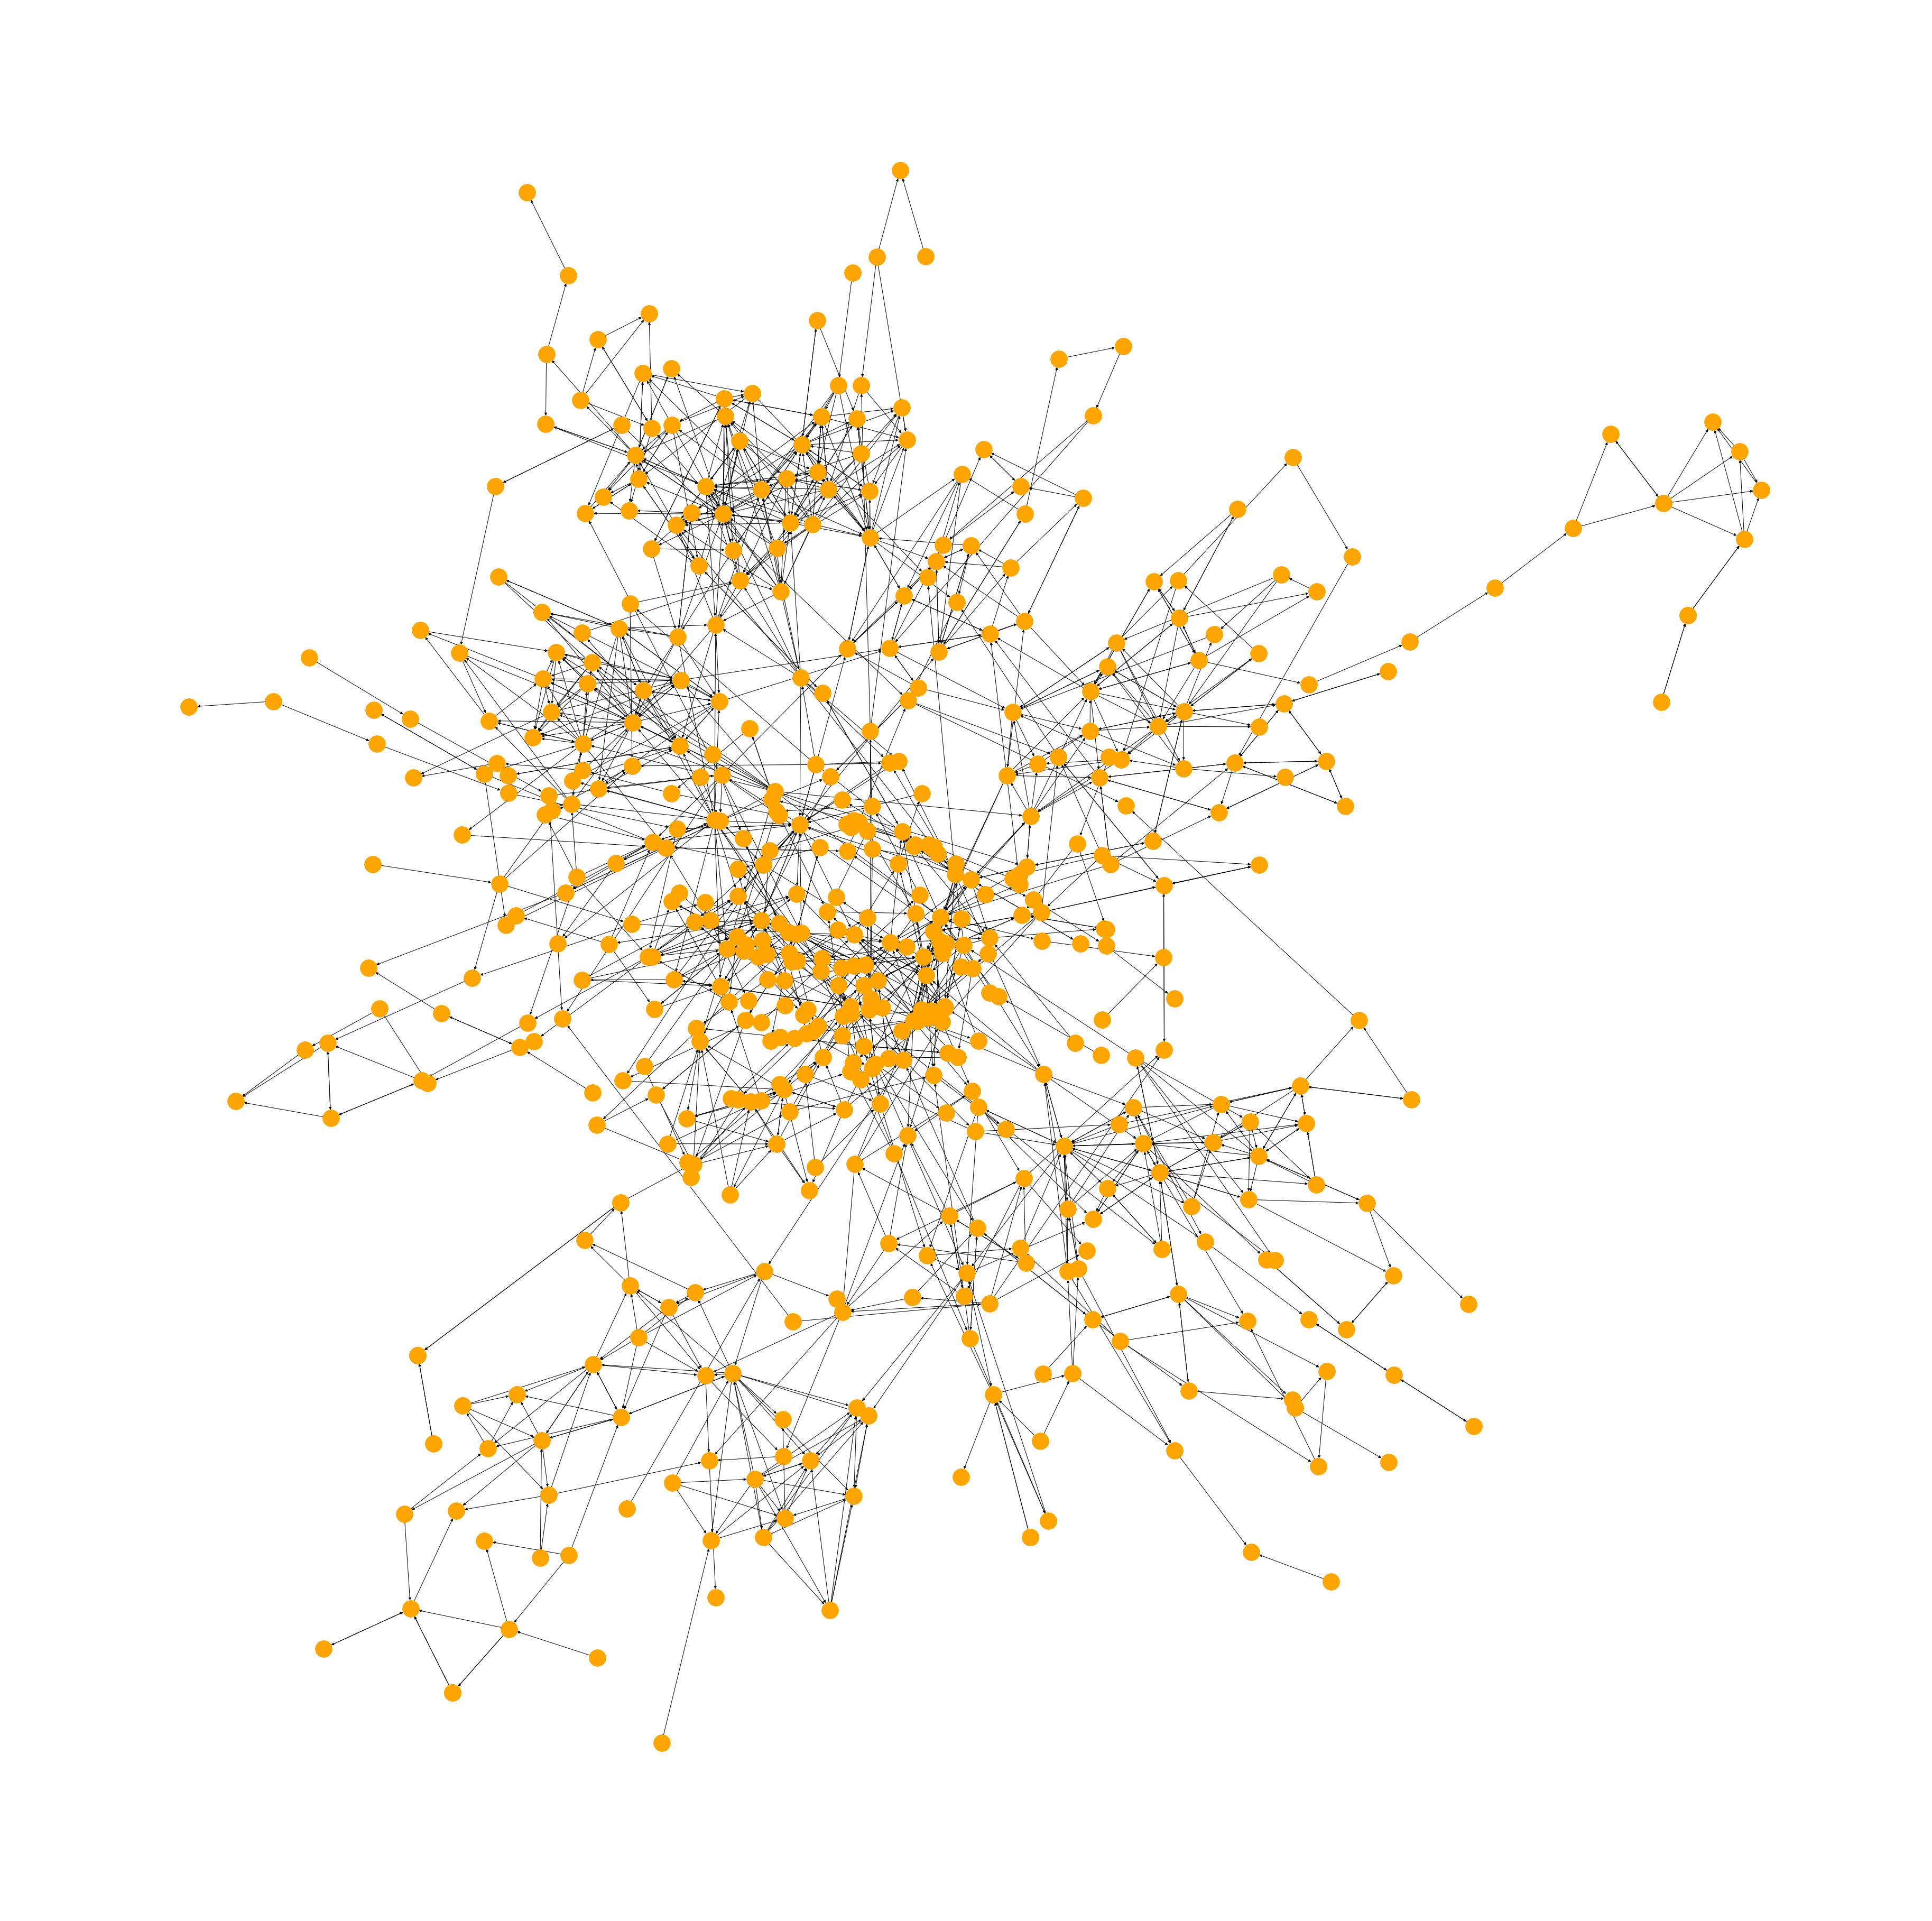

In [16]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 
 
G.add_edges_from(EDGES)


plt.figure(3,figsize=(50,50))
nx.draw_kamada_kawai(G,font_size=15,node_size=1000,node_color='orange',with_labels=False)
plt.savefig("net_"+org+"1.pdf")# Guardar la red en pdf. 
plt.show()

In [17]:
g=nx.number_of_nodes(G)
print('g=',g)
L=nx.number_of_edges(G)
print('L=',L)

g= 522
L= 1437


In [22]:
nx.square_clustering(G)

{'aldose 1-epimerase [EC:5.1.3.3]': 0,
 'glucokinase [EC:2.7.1.2]': 0.02247191011235955,
 '6-phospho-beta-glucosidase [EC:3.2.1.86]': 0.125,
 'glucose-6-phosphate isomerase [EC:5.3.1.9]': 0.038461538461538464,
 'glucose PTS system EIICBA or EIICB component [EC:2.7.1.199]': 0.3333333333333333,
 'phosphoglucomutase [EC:5.4.2.2]': 0.047619047619047616,
 'fructose-1,6-bisphosphatase II [EC:3.1.3.11]': 0.25,
 '6-phosphofructokinase 1 [EC:2.7.1.11]': 0.7777777777777778,
 'fructose-bisphosphate aldolase, class II [EC:4.1.2.13]': 0.16049382716049382,
 'triosephosphate isomerase (TIM) [EC:5.3.1.1]': 1,
 'glyceraldehyde 3-phosphate dehydrogenase [EC:1.2.1.12]': 0.3333333333333333,
 'phosphoglycerate kinase [EC:2.7.2.3]': 0,
 '2,3-bisphosphoglycerate-dependent phosphoglycerate mutase [EC:5.4.2.11]': 0.3333333333333333,
 'enolase [EC:4.2.1.11]': 0,
 'pyruvate kinase [EC:2.7.1.40]': 0.09713375796178345,
 'sugar PTS system EIIA component [EC:2.7.1.-]': 0.0,
 'L-lactate dehydrogenase [EC:1.1.1.27]': 

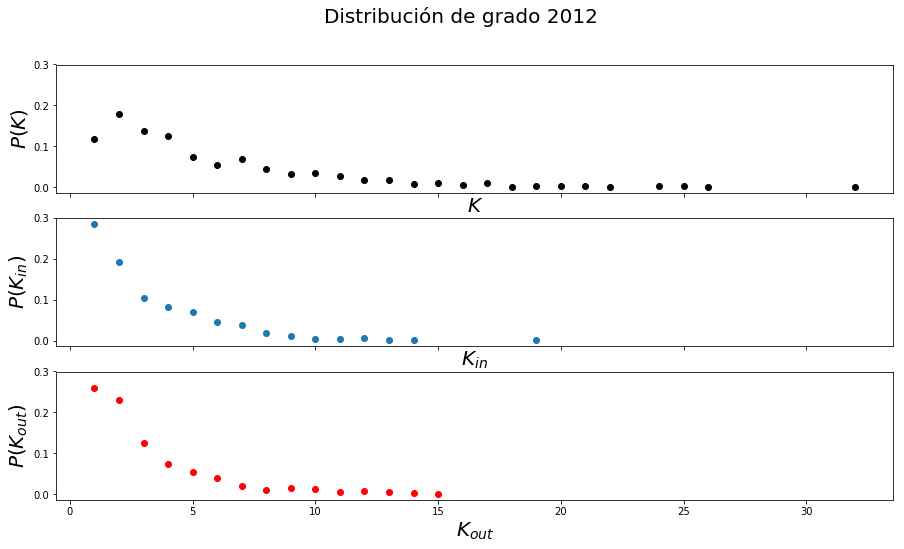

In [18]:
nodos=G.nodes

D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    

D_in=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.in_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_in.append(d[i])
    
    
D_out=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.out_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_out.append(d[i])
    
    
P=[]
X=[]
for i in range(1,max(D)+1):
    if D.count(i) != 0: 
        P.append(D.count(i)/len(D))
        X.append(i)
        
P_in=[]
X_in=[]
for i in range(1,max(D_in)+1):
    if D_in.count(i) != 0: 
        P_in.append(D_in.count(i)/len(D_in))
        X_in.append(i)  

P_out=[]
X_out=[]
for i in range(1,max(D)+1):
    if D_out.count(i) != 0: 
        P_out.append(D_out.count(i)/len(D_out))
        X_out.append(i)
        
        
        
# GRAFICA DE LA PROVAVILIDAD VS EL NUMERO DE GRADO        
fig, axs = plt.subplots( 3 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle('Distribución de grado 2012',fontsize=20)
axs[0].plot(X,P,'ko')         
axs[0].set_xlabel(r'$K$',fontsize=20)
axs[0].set_ylabel(r'$P(K)$',fontsize=20)

axs[1].plot(X_in,P_in,'o')         
axs[1].set_xlabel(r'$K_{in}$',fontsize=20)
axs[1].set_ylabel(r'$P(K_{in})$',fontsize=20)

axs[2].plot(X_out,P_out, 'ro')         
axs[2].set_xlabel(r'$K_{out}$',fontsize=20)
axs[2].set_ylabel(r'$P(K_{out})$',fontsize=20)

#plt.savefig("P_vs_k_2012.pdf")# Guardar la red en pdf.    

plt.show()

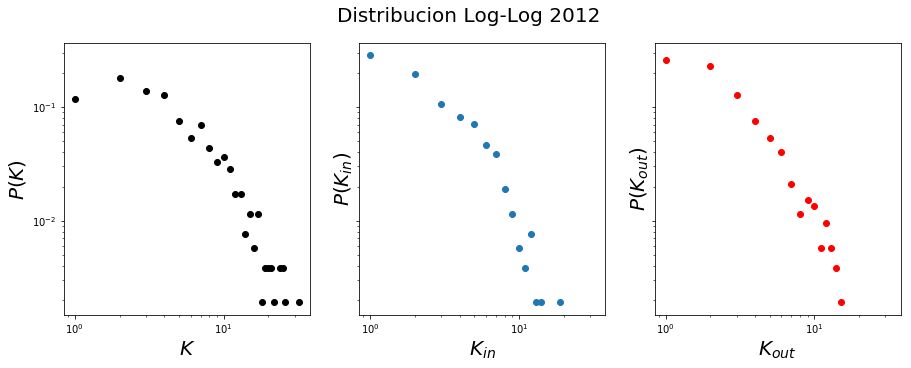

In [19]:

fig, (ax1, ax2 , ax3) = plt.subplots(1, 3 ,sharex = True, sharey = True, figsize=(15,5))
fig.suptitle('Distribucion Log-Log 2012',fontsize=20)
ax1.plot(X,P,'ko')
ax1.set_xlabel(r'$K$',fontsize=20)
ax1.set_ylabel(r'$P(K)$',fontsize=20)

ax2.plot(X_in,P_in,'o')
ax2.set_xlabel(r'$K_{in}$',fontsize=20)
ax2.set_ylabel(r'$P(K_{in})$',fontsize=20)

ax3.plot(X_out,P_out,'ro')
ax3.set_xlabel(r'$K_{out}$',fontsize=20)
ax3.set_ylabel(r'$P(K_{out})$',fontsize=20)

# Escala log-log
plt.xscale('log') 
plt.yscale('log') 

#plt.savefig("Ley_de_potencias_2012.pdf")# Guardar la red en pdf.

plt.show()

In [20]:
d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
d_in=G.in_degree(G)
d_out=G.out_degree(G)
degre=[]

for i in G.nodes:
    degre.append([i,d[i],d_in[i],d_out[i], d_in[i]-d_out[i] ])
df=pd.DataFrame(degre,columns=['Nombre', 'grado', 'grado_in', 'grado_out','dif_grado'])
df.sort_values(by='dif_grado', ascending=False)

,Nombre,grado,grado_in,grado_out,dif_grado
205,D-amino-acid oxidase [EC:1.4.3.3],8,8,0,8
145,nucleoside-triphosphatase [EC:3.6.1.15],10,9,1,8
128,adenine phosphoribosyltransferase [EC:2.4.2.7],16,12,4,8
124,phosphoribosylamine--glycine ligase / phosphor...,17,12,5,7
420,sphingoid base N-palmitoyltransferase [EC:2.3....,9,8,1,7
263,phenylalanine-4-hydroxylase [EC:1.14.16.1],10,8,2,6
366,phosphatidylinositol 4-kinase A [EC:2.7.1.67],6,6,0,6
142,adenosine kinase [EC:2.7.1.20],10,8,2,6
265,tryptophan 5-monooxygenase [EC:1.14.16.4],8,7,1,6
137,5'-nucleotidase [EC:3.1.3.5],32,19,13,6


In [21]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
print(intr.sort_values(by='intermediacion', ascending=False))

                                                  Name  intermediacion
170  aspartate aminotransferase, cytoplasmic [EC:2....        0.080279
19                       pyruvate kinase [EC:2.7.1.40]        0.066031
1                              hexokinase [EC:2.7.1.1]        0.065222
11   2,3-bisphosphoglycerate-dependent phosphoglyce...        0.056590
18          aldehyde dehydrogenase (NAD+) [EC:1.2.1.3]        0.055253
4                      phosphoglucomutase [EC:5.4.2.2]        0.049236
243  glutamine---fructose-6-phosphate transaminase ...        0.048742
44                          transketolase [EC:2.2.1.1]        0.045338
10                phosphoglycerate kinase [EC:2.7.2.3]        0.041271
9    glyceraldehyde 3-phosphate dehydrogenase [EC:1...        0.040072
245              glutamate decarboxylase [EC:4.1.1.15]        0.039165
12                               enolase [EC:4.2.1.11]        0.035353
241            glutamate synthase (NADH) [EC:1.4.1.14]        0.035244
70    